# Customers segmentation

**Las Wagones** is a company selling IT equipment , from small consumable items to large printers. Las Wagones has identified 4 customers segments noted _A, B, C and D_. These segments have been identified by the Sales department based on a study of the historical buying behavior of the customers. The Marketing department is very interested in understanding who are the customers inside these segments at an early stage. They ordered you for a study. This study aims at understanding what are these 4 segments.

In [1]:
# Load the nbresult package to be able to save your results 
from nbresult import ChallengeResult
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

## Data collection (9.5%)

### Loading data from the database

Download the `customers.sqlite` database from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.sqlite) and store it inside the `db` folder:

In [2]:
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.sqlite >> db/customers.sqlite

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  608k  100  608k    0     0  1674k      0 --:--:-- --:--:-- --:--:-- 1679k


#### Database schema

**📝 Open the `db/customers.sqlite` from your favorite SQL client and draw the database schema on the [schema editor](https://kitt.lewagon.com/db) on Kitt. Save the schema as `customers.xml` in the `db` folder.**

#### Querying the data

We want to get the following information about **all** the 8068 customers from the database:
- `id`: the unique identifier of the customer
- `gender`: customer's gender
- `married`: whether or not the customer has ever been married
- `age`: customer's age
- `graduated`: whether or not the customer has a degree
- `score`: customer's spending score (first order)
- `family_size`: the number of members of the customer's family, including the customer
- `profession`: customer's profession
- `work_experience`: customer's work experience in years
- `segment`: the segment the customer belongs to

**📝 Write the SQL query you need to fetch the data. Save it as a `str` in the `query` variable.**

In [3]:
query = '''SELECT c.id
	   ,c.gender
	   ,c.married
	   ,c.age
	   ,c.graduated
	   ,c.score
	   ,COUNT(r.id) + 1 AS family_size
	   ,p.category AS profession
	   ,e.duration AS work_experience
	   ,c.segment
FROM customers c
LEFT JOIN relatives r on r.customer_id  = c.id 
LEFT JOIN experiences e on e.customer_id = c.id 
LEFT JOIN professions p on p.id = e.profession_id
GROUP BY c.id'''

In [4]:
query_columns = ["id"
       ,"gender"
       ,"married"
       ,"age"
       ,"graduated"
       ,"score"
       ,"family_size"
       ,"profession"
       ,"work_experience"
       ,"segment"]

**📝 Connect to the database, execute the query and store the results into a `DataFrame` named `data`. Display the 10 first rows and the shape of the dataset.**

In [5]:
conn = sqlite3.connect('db/customers.sqlite')
c = conn.cursor()
c.execute(query)
rows = c.fetchall()
data = pd.DataFrame(rows)

In [6]:
data.columns = query_columns

In [7]:
data.head(10)

,id,gender,married,age,graduated,score,family_size,profession,work_experience,segment
0,1,Male,No,22,No,Low,4,Healthcare,1.0,D
1,2,Female,Yes,38,Yes,Average,3,Engineer,NaN,A
2,3,Female,Yes,67,Yes,Low,1,Engineer,1.0,B
3,4,Male,Yes,67,Yes,High,2,Lawyer,0.0,B
4,5,Female,Yes,40,Yes,High,6,Entertainment,NaN,A
5,6,Male,Yes,56,No,Average,2,Artist,0.0,C
6,7,Male,No,32,Yes,Low,3,Healthcare,1.0,C
7,8,Female,No,33,Yes,Low,3,Healthcare,1.0,D
8,9,Female,Yes,61,Yes,Low,3,Engineer,0.0,D
9,10,Female,Yes,55,Yes,Average,4,Artist,1.0,C


In [8]:
data.shape

(8068, 10)

#### 💾 Save your results

Run the following cell to save your results.

In [9]:
ChallengeResult('sql', query=query).write()

### Loading data from a CSV file

**📝 Load the data from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.csv) inside a `DataFrame` named `customers`.** 

Also, you can download the dataset into the `data` directory.

In [10]:
customers = pd.read_csv('data/customers.csv')

**💾 Save your results**

Run the following cell to save your results.

In [11]:
ChallengeResult('csv', data=customers).write()

## Data consulting challenge (33%)

### Data analysis & presentation

> Who are the customers composing the 4 segments? 

Based on the analysis of the `customers` dataset, prepare a slides deck to present your conclusions to the Marketing manager Debrah. The presentation must contain **5 slides maximum** (including the title slide). Feel free to choose the slide app of your choice.

ℹ️ Debrah is in fond of illustrations and statistics!

⚠️ Save your presentation in the current directory!

<AxesSubplot:>

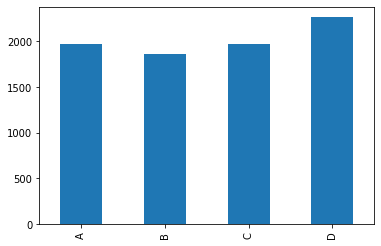

In [32]:
# Start your data analysis!
segments = pd.Series(customers.Segmentation.value_counts()).sort_index()
segments.plot(kind='bar')

The segment repartition is balanced

In [37]:
customers = customers.dropna()

In [40]:
customers

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,C
...,...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,B
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B


<AxesSubplot:>

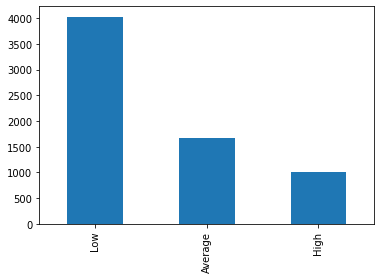

In [41]:
spending_score = pd.Series(customers.Spending_Score.value_counts())
spending_score.plot(kind='bar')

/home/elan/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


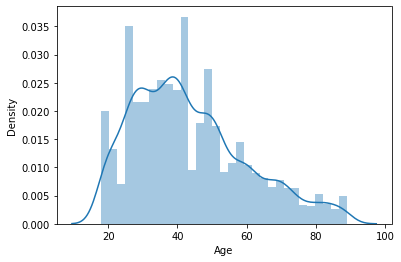

In [43]:
sns.distplot(customers['Age'])

/home/elan/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


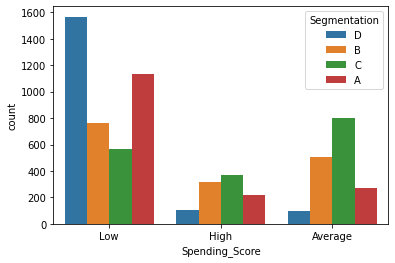

In [47]:
sns.countplot(customers.Spending_Score, hue=customers.Segmentation)

/home/elan/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending_Score', ylabel='count'>

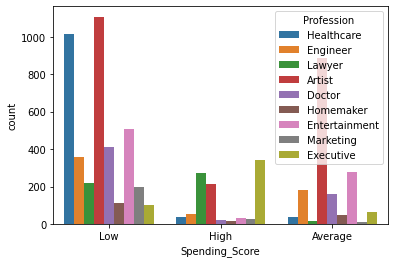

In [48]:
sns.countplot(customers.Spending_Score, hue=customers.Profession)

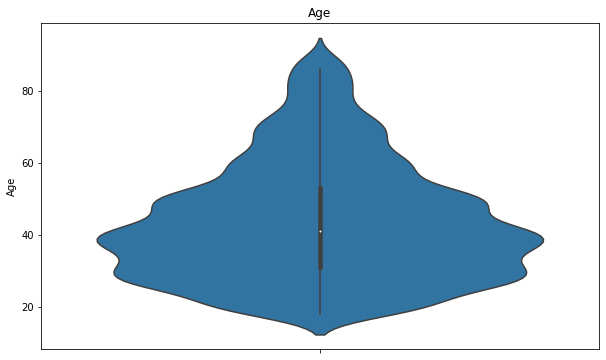

In [49]:
plt.figure(figsize=(10,6))
plt.title("Age")
sns.axes_style("dark")
sns.violinplot(y=customers["Age"])
plt.show()

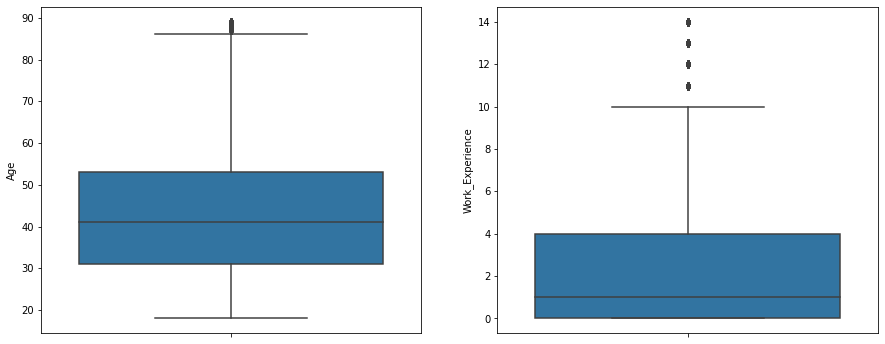

In [55]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=customers["Age"])
plt.subplot(1,2,2)
sns.boxplot(y=customers["Work_Experience"])
plt.show()

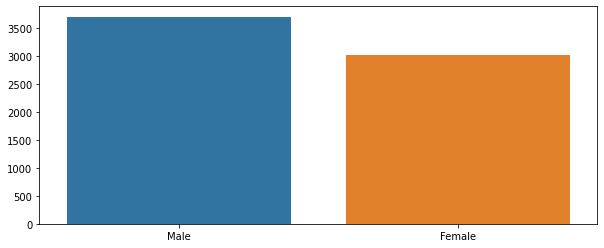

In [56]:
genders = customers.Gender.value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

/home/elan/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ever_Married', ylabel='count'>

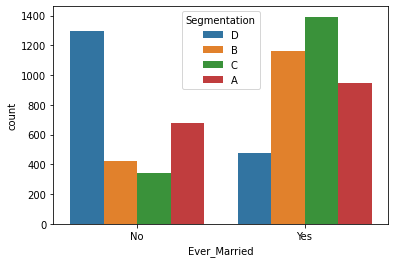

In [61]:
sns.countplot(customers.Ever_Married, hue=customers.Segmentation)

/home/elan/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profession', ylabel='count'>

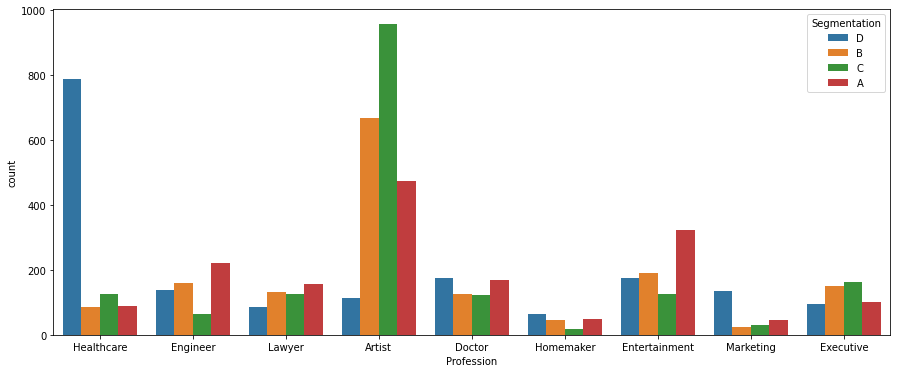

In [63]:
plt.figure(figsize=(15,6))
sns.countplot(customers.Profession, hue=customers.Segmentation)

### Segmentation relevance

Debrah has a doubt about the number of customers segments designed by the Sales department. Base on an empirical method, the elbow method, and a clustering approach **can you tell her if it is an optimal segmentation or not?**

Store the optimal number of segments inside the `n_clusters` variable.

In [60]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

In [70]:
customers_dummies = customers.drop(columns='Segmentation').dropna()
df = pd.get_dummies(customers_dummies, prefix=['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score'])
df

,ID,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,...,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,462809,22,1.0,4.0,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,466315,67,1.0,1.0,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
3,461735,67,0.0,2.0,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
5,461319,56,0.0,2.0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
6,460156,32,1.0,3.0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,41,0.0,5.0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
8064,464685,35,3.0,4.0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
8065,465406,33,1.0,1.0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
8066,467299,27,1.0,4.0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1


Text(0.5, 0, 'Cluster nb')

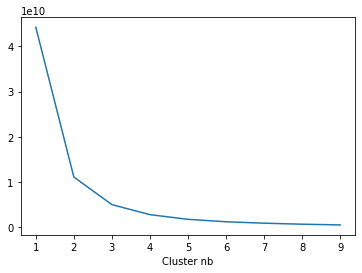

In [69]:
inertias = []
ks = range(1,10)
for k in ks:
    km_test = KMeans(n_clusters=k).fit(df)
    inertias.append(km_test.inertia_)
plt.plot(ks, inertias)
plt.xlabel("Cluster nb")

<AxesSubplot:>

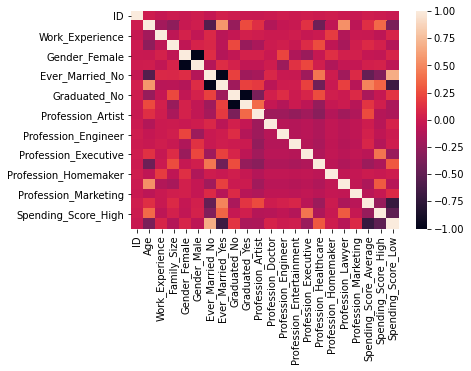

In [68]:
sns.heatmap(df.corr())

In [95]:
n_clusters = 3
model = KMeans(n_clusters=3)

In [96]:
pca = PCA(2)
df = pca.fit_transform(df)

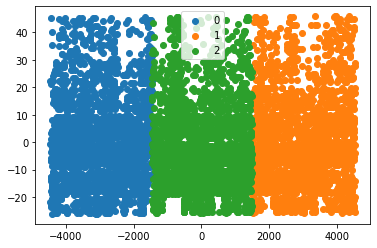

In [97]:
label = model.fit_predict(df)

u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

**💾 Save your results**

Run the following cell to save your results.

In [ ]:
ChallengeResult('clusters', n_clusters=n_clusters).write()

### Segment D statistics

In addition the marketing team is really interested in the **segment D** so you will have to answer some questions about it. 

To do so, we are considering a binary segmentation: **D vs the rest**. Download the `customers_encoded.csv` dataset from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers_encoded.csv) and store it into the `data` folder.

#### Loading data

In [98]:
# Load the data and display the first rows
customers_e = pd.read_csv('data/customers_encoded.csv')

In [99]:
customers_e.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation,is_D
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D,1
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A,0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B,0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B,0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A,0


After loading the data you can see a new column `is_D` which take the value `1` if the customer belongs to the segment D, `0` otherwise.

#### Age analysis of segment D

❓ Using a statistical test, show than customers from segment D are **statistically younger** than the whole customers. 

Store the $p-value$ of your test inside a `p_value` variable.

/home/elan/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_D', ylabel='Age'>

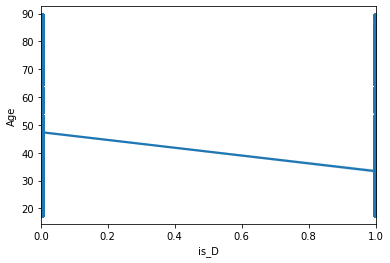

In [104]:
# Test
from sklearn import linear_model
from scipy import stats
import numpy as np

X = customers_e['Age']
y = customers_e['is_D']

sns.regplot(y, X, data=customers_e)

In [105]:
import statsmodels.formula.api as smf
# instanciate a model
model = smf.ols(formula='Age ~ is_D', data=customers_e)

# train the model to find best line
model = model.fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     1337.
Date:                Thu, 18 Mar 2021   Prob (F-statistic):          5.51e-271
Time:                        13:40:41   Log-Likelihood:                -33549.
No. Observations:                8068   AIC:                         6.710e+04
Df Residuals:                    8066   BIC:                         6.712e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.4072      0.203    233.247      0.000      47.009      47.806
is_D         -14.0170      0.383    -36.565      0.000     -14.768     -13.266
==============================================================================
Omnibus:                      984.673   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1383.919
Skew:                           0.961   Prob(JB):                    3.06e-301
Kurtosis:                       3.647   Cond. No.                         2.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
df1 = customers_e[customers_e['is_D'] ==1]
df2 = customers_e[customers_e['is_D'] ==0]
mean_D = np.mean(df1['Age'])
mean_non_D = np.mean(df2['Age'])
print(mean_D, mean_non_D)

33.39021164021164 47.40724137931034


In [106]:
# p_value
p_value = model.pvalues

Intercept     0.000000e+00
is_D         5.514861e-271
dtype: float64

#### Segment D odds analysis

❓ What are the **odds** for a customer to be in the segment D?

Store the result inside a `odds` variable.

In [129]:
# odds
nb_D = df1['ID'].count
nb_all = customers_e['ID'].count
odds = nb_D / nb_all

TypeError: unsupported operand type(s) for /: 'method' and 'method'

❓ Considering a **married and graduated** customer, how are the odds of being part of segment D **multiplied** while **increasing** the age by 1 year?

Store the result inside a `odds_variation` variable.

In [ ]:
# odds_variation

####  💾 Save your results

Run the following cell to save your results.

In [ ]:
ChallengeResult('segment_d', p_value=p_value, odds=odds, gap=odds_variation).write()

**⚠️ Save your notebook then commit and push your code on GitHub**